#  Analyzing Customer Behavior in eCommerce 

## Objective: Understand customer behavior, optimize sales strategies, and enhance profitability for an eCommerce business.

# Step 1: Data Collection & Exploration

In [2]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('D:/rutu/ty_project/main/E-commerce Dataset.csv')

In [4]:
df.head(10)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
5,2018-07-09,21:57:05,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card
6,2018-05-16,13:10:30,1.0,26767,Female,Web,Member,Auto & Accessories,Car Mat,54.0,1.0,0.3,54.0,5.4,High,credit_card
7,2018-06-23,18:29:09,7.0,20719,Female,Web,Member,Auto & Accessories,Car Seat Covers,114.0,5.0,0.2,22.6,2.3,Critical,credit_card
8,2018-07-29,11:55:02,7.0,46947,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,116.4,11.6,Critical,credit_card
9,2018-05-16,19:41:10,10.0,31839,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.2,54.4,5.4,Critical,money_order


In [5]:
#checking missing values
df.isnull().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

In [6]:
#dropping rows with missing values for time-series completeness
ecom = df.dropna()

In [7]:
#checking for duplicates in data
duplicate_rows = ecom.duplicated()
print(duplicate_rows)

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51282, dtype: bool


In [8]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51282 non-null  object 
 1   Time                 51282 non-null  object 
 2   Aging                51282 non-null  float64
 3   Customer_Id          51282 non-null  int64  
 4   Gender               51282 non-null  object 
 5   Device_Type          51282 non-null  object 
 6   Customer_Login_type  51282 non-null  object 
 7   Product_Category     51282 non-null  object 
 8   Product              51282 non-null  object 
 9   Sales                51282 non-null  float64
 10  Quantity             51282 non-null  float64
 11  Discount             51282 non-null  float64
 12  Profit               51282 non-null  float64
 13  Shipping_Cost        51282 non-null  float64
 14  Order_Priority       51282 non-null  object 
 15  Payment_method       51282 non-null  obje

In [9]:
ecom.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000
mean,5.255187,58159.746656,152.337350,2.502964,0.303838,70.401796,7.041166
std,2.960073,26031.763189,66.492468,1.511834,0.131025,48.728131,4.871685
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35841.500000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61021.500000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80739.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


# Step 2: Customer Segmentation

In [10]:
gender_segmentation = ecom.groupby('Gender')['Customer_Id'].count()
gender_segmentation

Gender
Female    23150
Male      28132
Name: Customer_Id, dtype: int64

## Analyzing purchasing behavior by Gender Segmentation

In [11]:
# Convert the date column to datetime

ecom.loc[:, 'Order_Date'] = pd.to_datetime(ecom['Order_Date'])

# Group by 'Gender' and the date column, and calculate the sum of 'Sales' for each group
time_series_data = ecom.groupby(['Gender', 'Order_Date'])['Sales'].sum().reset_index()


In [12]:
ecom.head(100)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02 00:00:00,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24 00:00:00,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08 00:00:00,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18 00:00:00,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13 00:00:00,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2018-10-05 00:00:00,09:10:34,8.0,56399,Male,Web,Member,Auto & Accessories,Car Seat Covers,114.0,1.0,0.3,20.3,2.0,High,credit_card
98,2018-11-26 00:00:00,11:04:26,5.0,27009,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,1.0,0.2,141.8,14.2,Critical,credit_card
99,2018-05-17 00:00:00,08:36:11,2.0,35336,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.1,58.6,5.9,Critical,credit_card
100,2018-07-30 00:00:00,22:41:44,6.0,26503,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.3,99.4,9.9,Critical,money_order


In [13]:
# Create time series plots by gender
genders = time_series_data['Gender'].unique()

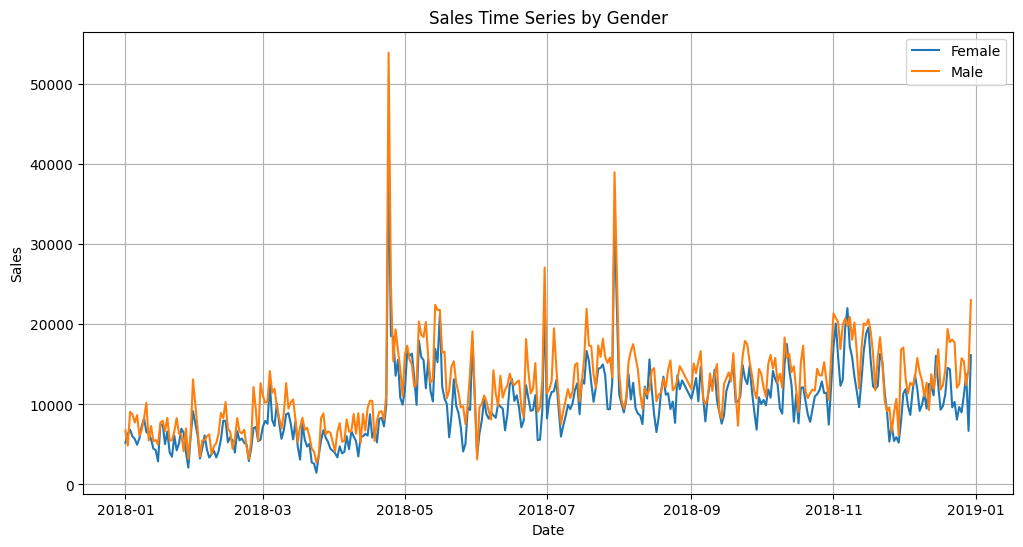

In [14]:
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data[time_series_data['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Sales'], label=gender)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series by Gender')
plt.legend()
plt.grid(True)
plt.show()

In [15]:

purchasing_behavior = ecom.groupby('Gender')['Sales'].mean()
print(purchasing_behavior)


Gender
Female    151.365961
Male      153.136713
Name: Sales, dtype: float64


In [16]:
purchasing_behavior_profit = ecom.groupby('Gender')['Profit'].mean()
print(purchasing_behavior_profit)

Gender
Female    69.987058
Male      70.743086
Name: Profit, dtype: float64


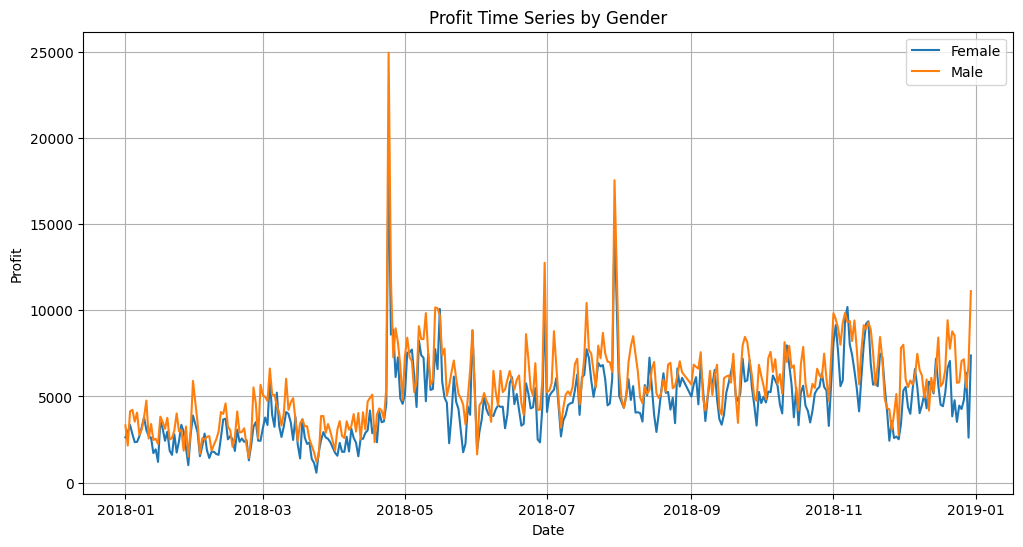

In [17]:
# Group by 'Gender' and the date column, and calculate the sum of 'Profit' for each group
time_series_data_profit = ecom.groupby(['Gender', 'Order_Date'])['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data_profit[time_series_data['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Profit'], label=gender)

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit Time Series by Gender')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
purchasing_behavior_quantity = ecom.groupby('Gender')['Quantity'].mean()
print(purchasing_behavior_quantity)

Gender
Female    2.550929
Male      2.463494
Name: Quantity, dtype: float64


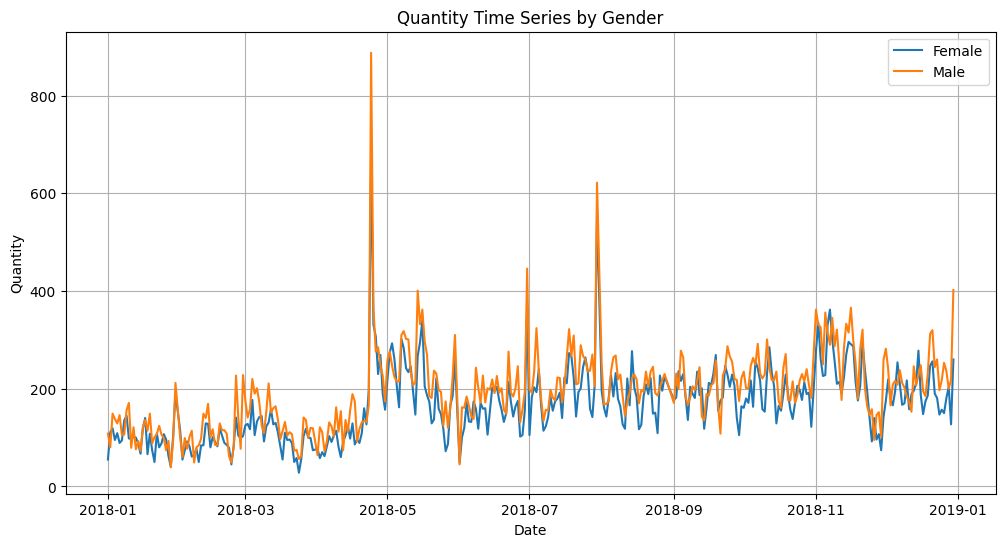

In [21]:
# Group by 'Gender' and the date column, and calculate the sum of 'Quantity' for each group
time_series_data_qty = ecom.groupby(['Gender', 'Order_Date'])['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
for gender in genders:
    gender_data = time_series_data_qty[time_series_data_qty['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Quantity'], label=gender)

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Quantity Time Series by Gender')
plt.legend()
plt.grid(True)
plt.show()

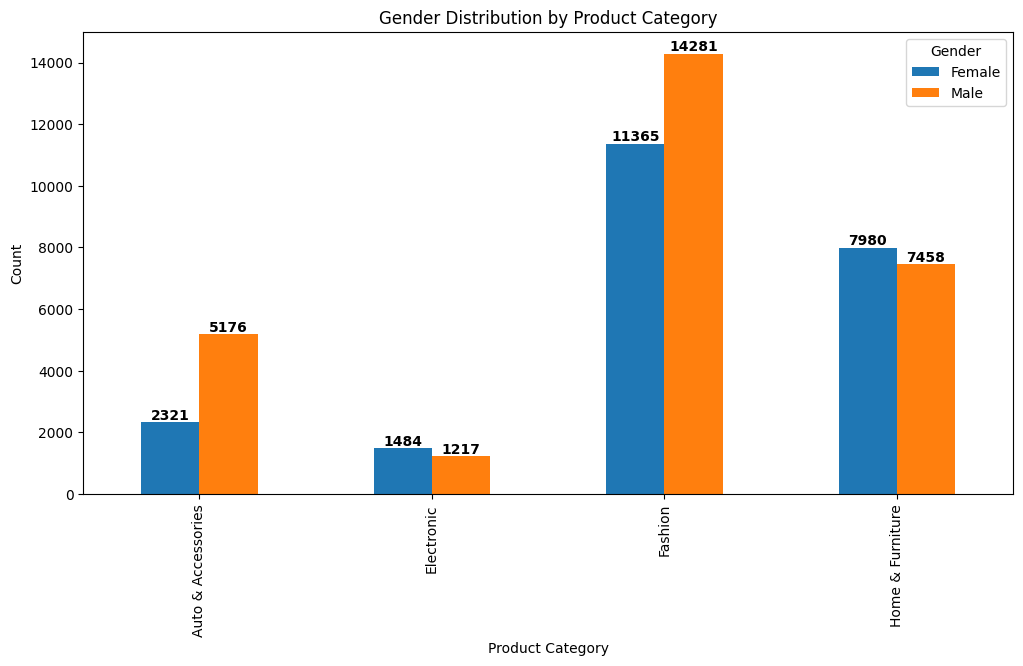

In [22]:

gender_category_counts = ecom.groupby(['Product_Category', 'Gender']).size().unstack()

# Create a bar plot
ax = gender_category_counts.plot(kind='bar', stacked=False, figsize=(12, 6))

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')


# Customize the plot
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Gender Distribution by Product Category')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

# Show the plot
plt.show()


## Overall, both Gender Segments have had very similar purchasing behaviours over the course of 12 months with male customers being interested more in Auto & Accessories and Fashion products more than their female counterparts.

## Customer segmentation by device type

In [24]:

purchasing_behavior = ecom.groupby('Device_Type')['Sales'].mean()
print(purchasing_behavior)


Device_Type
Mobile    154.002187
Web       152.209474
Name: Sales, dtype: float64


In [24]:



purchasing_behavior = ecom.groupby('Device_Type')['Sales'].mean()
print(purchasing_behavior)


Device_Type
Mobile    154.002187
Web       152.209474
Name: Sales, dtype: float64


In [25]:
# Convert the date column to datetime
ecom.loc[:, 'Order_Date'] = pd.to_datetime(ecom['Order_Date'])
# Group by 'Device' and the date column, and calculate the sum of 'Sales' for each group
time_series_data = ecom.groupby(['Device_Type', 'Order_Date'])['Sales'].sum().reset_index()

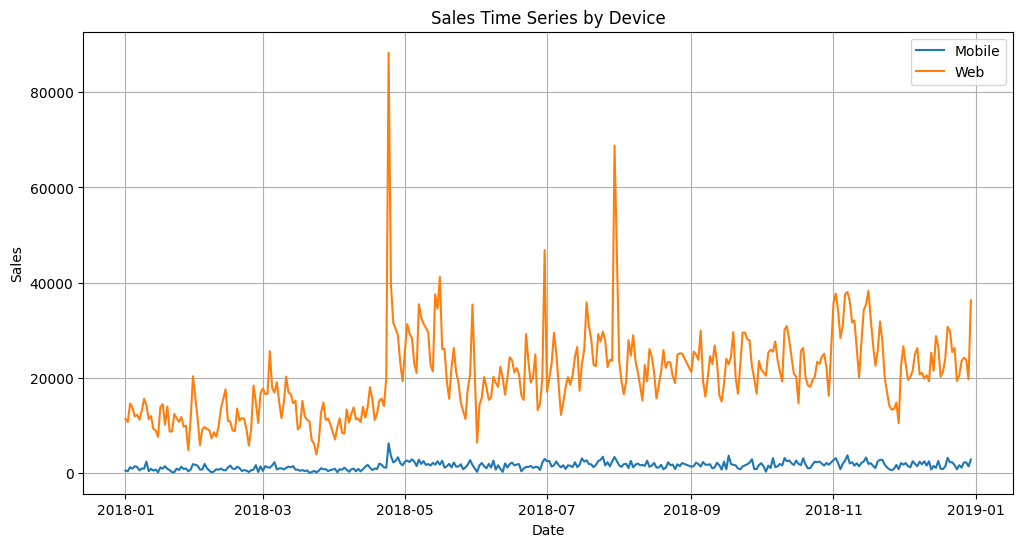

In [26]:
# Create time series plots by Device
devices = time_series_data['Device_Type'].unique()
plt.figure(figsize=(12, 6))
for device in devices:
    device_data = time_series_data[time_series_data['Device_Type'] == device]
    plt.plot(device_data['Order_Date'], device_data['Sales'], label=device)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series by Device')
plt.legend()
plt.grid(True)
plt.show()

## As we can see above sales by Web were much higher than Sales by Mobile, this suggests that there might be some seasonality or periodicity in the sales data even though the means are similar

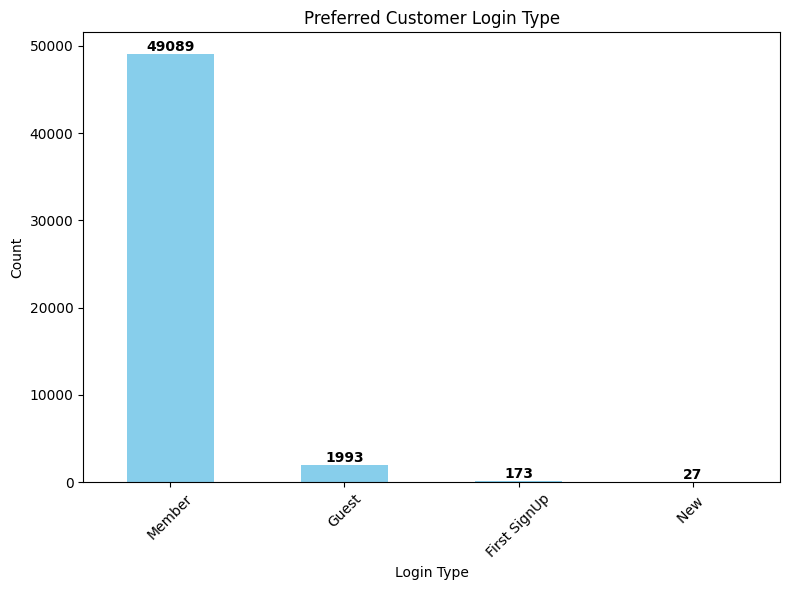

In [23]:


# Group the data by 'Customer_Login_Type' and count the occurrences of each type
login_type_counts = ecom['Customer_Login_type'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
ax=login_type_counts.plot(kind='bar', color='skyblue')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')
plt.title('Preferred Customer Login Type')
plt.xlabel('Login Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the graph
plt.show()


* The large number of "Member" login types could suggest that your customers appreciate the benefits of having accounts, such as order history, personalized recommendations, or loyalty programs. They might be returning customers who prefer the convenience of logging in.

# Step 3: Analyzing Sales

datetime64[ns]
Number of NaT values in 'Order_Date': 0


C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10172\1301238026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['Order_Date'] = pd.to_datetime(ecom['Order_Date'], errors='coerce')
C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10172\1301238026.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom['Month'] = ecom['Order_Date'].dt.month
C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_10172\1301238026.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

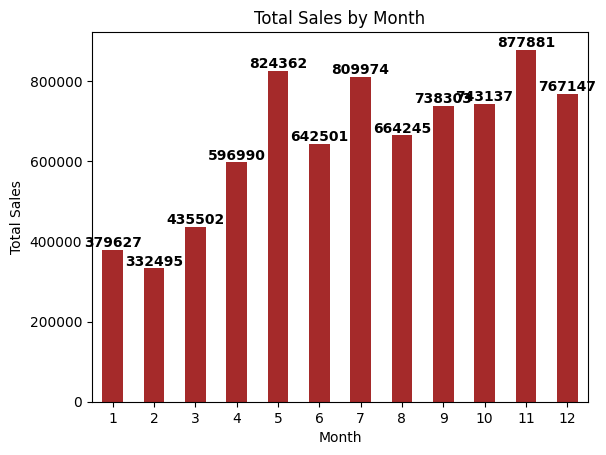

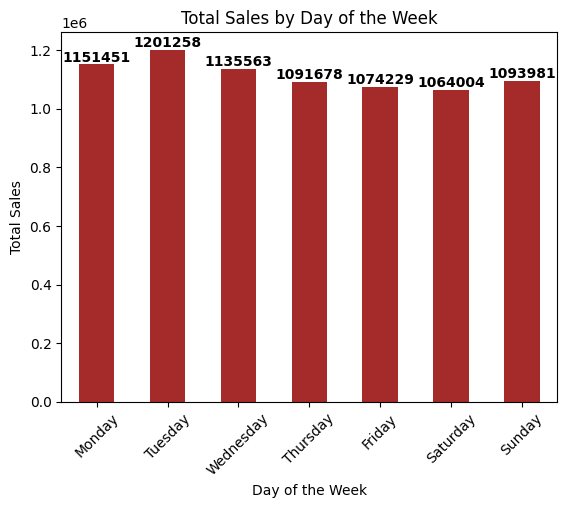

In [25]:


# Assuming ecom is your DataFrame
# Check the data type of 'Order_Date'
print(ecom['Order_Date'].dtype)

# Convert 'Order_Date' to datetime, coercing errors
ecom['Order_Date'] = pd.to_datetime(ecom['Order_Date'], errors='coerce')

# Check for NaT values
print(f"Number of NaT values in 'Order_Date': {ecom['Order_Date'].isna().sum()}")

# Extract month and day of the week
ecom['Month'] = ecom['Order_Date'].dt.month
ecom['Day_of_Week'] = ecom['Order_Date'].dt.dayofweek  # Monday=0, Sunday=6

# Total sales by month
monthly_sales = ecom.groupby('Month')['Sales'].sum()
ax=monthly_sales.plot(kind='bar', color='brown', xlabel='Month', ylabel='Total Sales', title='Total Sales by Month')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

# Total sales by day of the week
day_of_week_sales = ecom.groupby('Day_of_Week')['Sales'].sum()
day_of_week_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax=day_of_week_sales.plot(kind='bar', color='brown', xlabel='Day of the Week', ylabel='Total Sales', title='Total Sales by Day of the Week')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')
plt.xticks(rotation=45)
plt.show()



## From the bar graphs above we can see that sales are the highest in November, May and July. In terms of days, sales peak on Tuesdays 

Total Sales: $7812164.00
Total Profit: $3610344.90


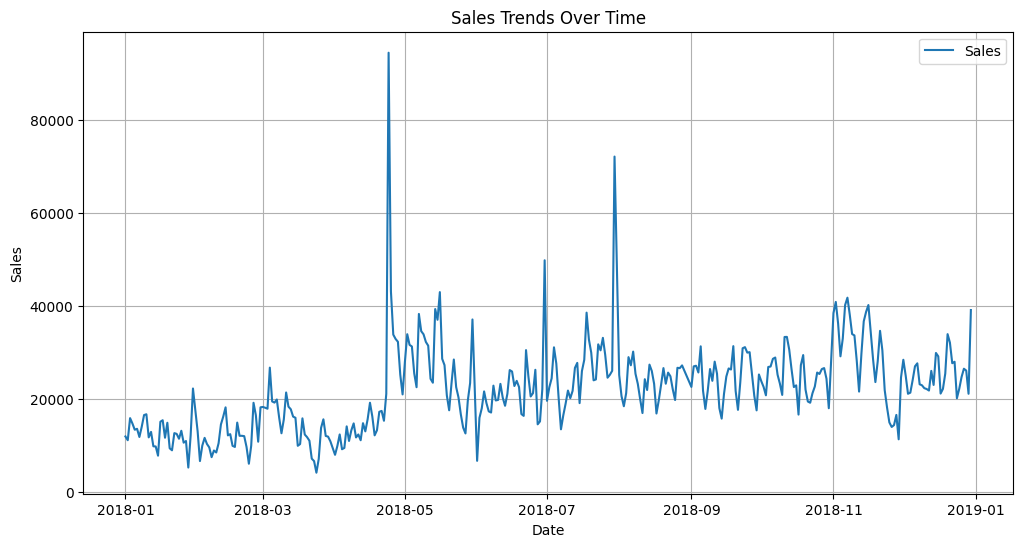


Top Selling Products:
Product
T - Shirts       578336.0
Titak watch      531468.0
Running Shoes    522144.0
Jeans            508376.0
Formal Shoes     496503.0
Shirts           457072.0
Fossil Watch     370788.0
Towels           351348.0
Sofa Covers      332424.0
Bed Sheets       325151.0
Name: Sales, dtype: float64

Top Selling Product Categories:
Product_Category
Fashion               4345914.0
Home & Furniture      1975831.0
Auto & Accessories    1095681.0
Electronic             394738.0
Name: Sales, dtype: float64


In [29]:
# Calculate total sales and profit
total_sales = ecom['Sales'].sum()
total_profit = ecom['Profit'].sum()

print(f'Total Sales: ${total_sales:.2f}')
print(f'Total Profit: ${total_profit:.2f}')

# Convert the 'Order_Date' column to datetime
df['Order_Date'] = pd.to_datetime(ecom['Order_Date'])

# Analyze sales trends over time
sales_over_time = ecom.groupby('Order_Date')['Sales'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index, sales_over_time.values, label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Identify the top-selling products and product categories
top_products = ecom.groupby('Product')['Sales'].sum().nlargest(10)
top_categories = ecom.groupby('Product_Category')['Sales'].sum().nlargest(5)

print('\nTop Selling Products:')
print(top_products)

print('\nTop Selling Product Categories:')
print(top_categories)







In [30]:
unique_payment_methods = ecom['Payment_method'].unique()
print(unique_payment_methods)

['credit_card' 'money_order' 'e_wallet' 'debit_card' 'not_defined']


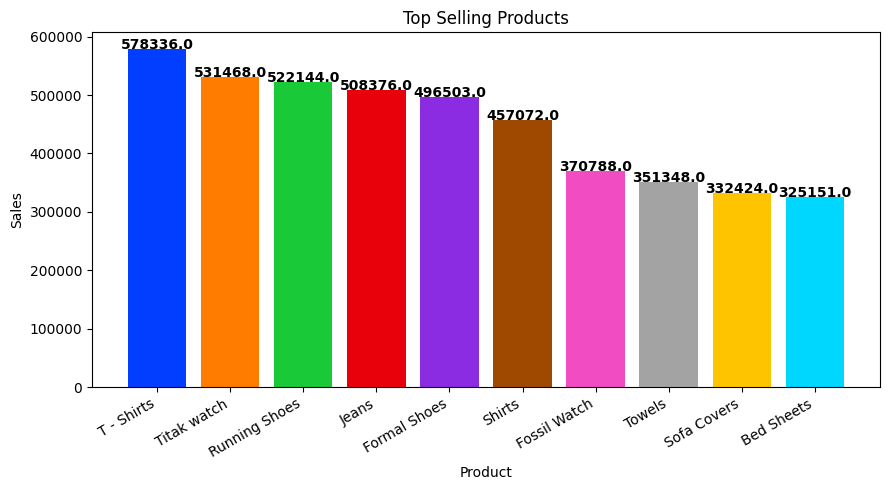

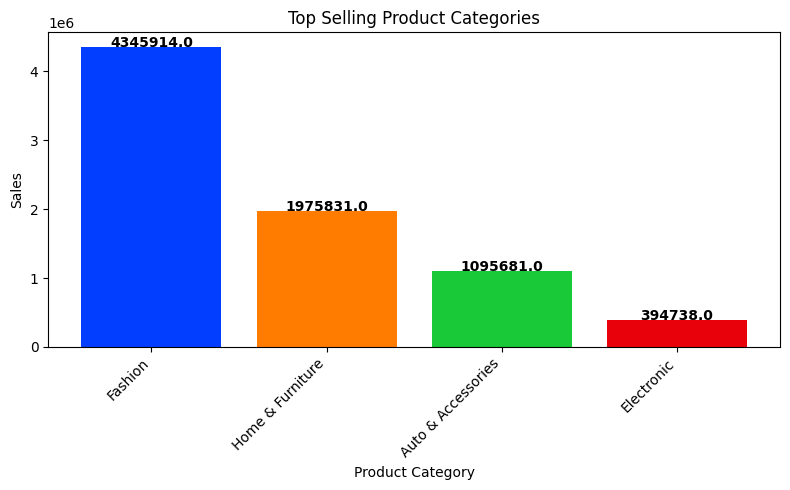

In [38]:
plt.close('all')
colors = sns.color_palette("bright", len(top_products))

# Create bar graphs for top-selling products with different colors
plt.figure(figsize=(9, 5))
bars=plt.bar(top_products.index, top_products.values, color=colors)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{bar.get_height()}',
             ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Top Selling Products')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Define a color palette for the bars
colors = sns.color_palette("bright", len(top_categories))


# Create bar graphs for top-selling product categories with different colors
plt.figure(figsize=(8, 5))
bar1=plt.bar(top_categories.index, top_categories.values, color=colors)
for bar in bar1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{bar.get_height()}',
             ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Top Selling Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Step 4: Customer Behavior Analysis:



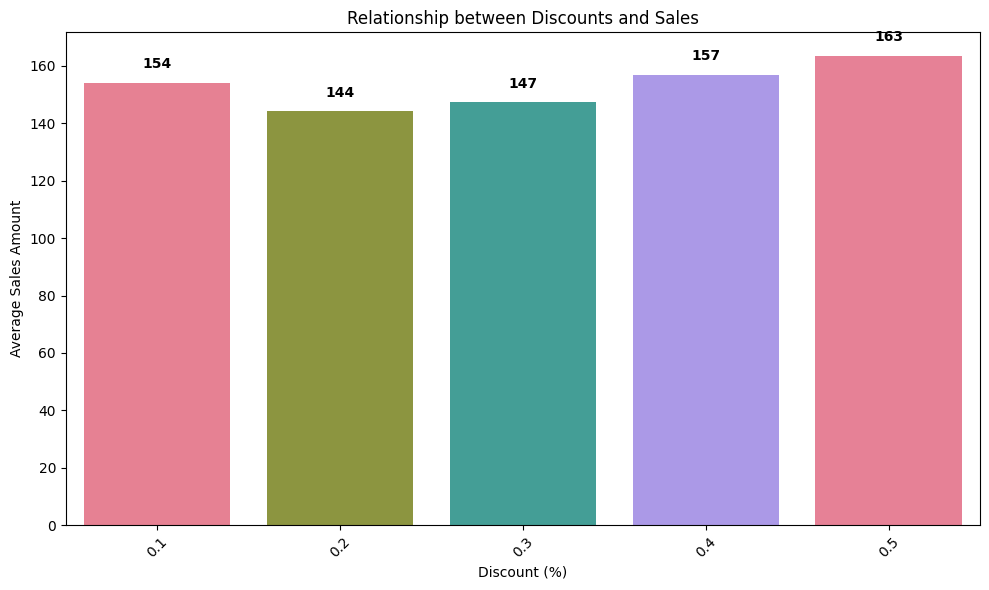

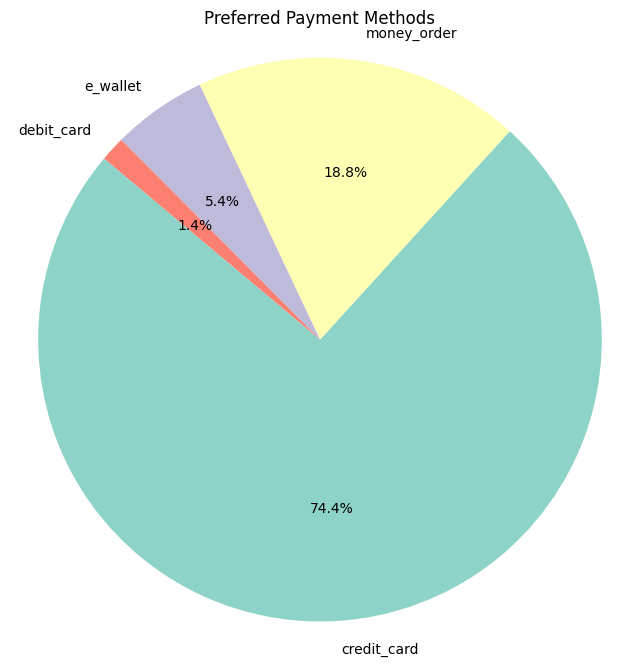

In [44]:
# Analyze the average order aging period and its impact on sales
avg_order_aging = ecom.groupby('Customer_Id')['Aging'].mean()
avg_order_aging_sales = ecom.groupby('Customer_Id')['Sales'].sum()



discount_sales = ecom.groupby('Discount')['Sales'].mean()

# Create a bar plot to visualize the relationship between discounts and sales
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=discount_sales.index, y=discount_sales.values, hue=discount_sales.index, palette="husl", legend=False)


for bar in ax.patches:  # Use `ax.patches` to iterate over bars
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{bar.get_height():.0f}', 
            ha='center', fontsize=10, fontweight='bold')
    
plt.xlabel('Discount (%)')
plt.ylabel('Average Sales Amount')
plt.title('Relationship between Discounts and Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Drop rows with undefined payment methods (assuming undefined is represented by 'not defined' in your data)
ecom = ecom[ecom['Payment_method'] != 'not_defined']

# Determine the preferred payment methods of customers
payment_methods = ecom['Payment_method'].value_counts()

# Create a pie chart to visualize the preferred payment methods
plt.figure(figsize=(8, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Preferred Payment Methods')
plt.show()







## As we can see from the graphs above:
*  Longer order fulfillment times might be turning customers away, resulting in lower sales. Customers can wait up to day 6. Beyond that point, however, further increases in order aging might have a negative impact on sales.
* In terms of discounts and sales, it is clear that there is a positive correlation between the two. The higher the discounts the higher the sales. For example, 50% discounts yielded on average 160 sales
* In terms of the payments methods, it is clear that customers prefer credit cards, followed by money order,e-wallet and debit card respectively.


* Customers who select "Critical" as their order priority likely have higher expectations for speedy delivery, and your company appears to be meeting those expectations. In contrast, customers choosing "Low" priority may not expect rapid delivery, so it might not be a priority for them.

# Step 5: Recommendations

### 1. Sales Discrepancy between Web and Mobile: The significant difference in sales between Web and Mobile platforms, even though the means are similar, suggests potential seasonality or periodicity in sales data. To capitalize on this trend, consider launching platform-specific promotions or optimizing the user experience for each platform to maximize sales potential.

### 2. Member Login Types: The prevalence of "Member" login types indicates a strong appreciation among customers for account-related benefits. To further leverage this trend, continue enhancing the features and benefits of member accounts, such as personalized recommendations and loyalty programs, to encourage more customers to create accounts.

### 3. Sales Trends by Month and Day: Sales peaking in November, May, and July, along with higher sales on Tuesdays, suggests that certain times of the year and days of the week are more favorable for sales. Plan marketing campaigns and promotions around these peak times to maximize sales revenue.

### 4. Top Selling Products and Categories: Identify top-selling products and categories to focus marketing efforts and inventory management. Ensure that these products remain well-stocked and consider bundling or cross-promoting related items to increase average order value.

### 5. Order Aging and Sales: Recognize that longer order fulfillment times (up to day 6) may negatively impact sales. Strive to optimize order processing and fulfillment to meet customer expectations and improve sales conversion rates.

### 6. Discounts and Sales: Capitalize on the observed positive correlation between discounts and sales. Consider strategic discounting strategies, such as offering targeted discounts on high-margin products or during peak sales periods, to drive revenue growth.

### 7. Preferred Payment Methods: Acknowledge that customers prefer credit cards, followed by money orders, e-wallets, and debit cards. Ensure that your payment processing infrastructure is robust, secure, and capable of accommodating these preferred payment methods to enhance the overall shopping experience.

### 8. Order Priority and Delivery Speed: Recognize that customers selecting "Critical" order priority expect rapid delivery and that this expectation is being met. Evaluate whether there are opportunities to further expedite deliveries for critical orders. For "Low" priority orders, consider communication strategies that manage customer expectations regarding longer delivery times.

### 9. Consider tailoring marketing and product offerings to target male customers more effectively in the auto and accessories and fashion product categories.







